In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow import keras

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
df = pd.read_csv('/content/drive/MyDrive/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
df['Species'].value_counts()


Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [15]:
df.isnull().sum()


Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
species_name = le.classes_
print(species_name)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [17]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [18]:
species_name = le.classes_
print(species_name)

[0 1 2]


In [19]:
X = df.drop(columns=['Id', 'Species'])
y = df['Species']
X.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=69)

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [25]:
print(y[:5])


0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64


In [26]:
y_train = keras.utils.to_categorical(y_train, num_classes=3)
print(y_train[:5])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [27]:
x_train.shape


(105, 4)

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [29]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(x_train.shape[-1], )))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1315 (5.14 KB)
Trainable params: 1315 (5.14 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
model.fit(x_train, y_train, epochs=100, verbose=2)


Epoch 1/100
4/4 - 1s - loss: 1.0524 - accuracy: 0.4190 - 918ms/epoch - 230ms/step
Epoch 2/100
4/4 - 0s - loss: 1.0403 - accuracy: 0.4476 - 17ms/epoch - 4ms/step
Epoch 3/100
4/4 - 0s - loss: 0.9630 - accuracy: 0.4857 - 15ms/epoch - 4ms/step
Epoch 4/100
4/4 - 0s - loss: 0.9720 - accuracy: 0.5238 - 13ms/epoch - 3ms/step
Epoch 5/100
4/4 - 0s - loss: 0.8761 - accuracy: 0.6476 - 14ms/epoch - 3ms/step
Epoch 6/100
4/4 - 0s - loss: 0.8898 - accuracy: 0.6571 - 15ms/epoch - 4ms/step
Epoch 7/100
4/4 - 0s - loss: 0.8713 - accuracy: 0.6286 - 19ms/epoch - 5ms/step
Epoch 8/100
4/4 - 0s - loss: 0.8129 - accuracy: 0.6857 - 13ms/epoch - 3ms/step
Epoch 9/100
4/4 - 0s - loss: 0.8021 - accuracy: 0.6857 - 14ms/epoch - 4ms/step
Epoch 10/100
4/4 - 0s - loss: 0.7706 - accuracy: 0.7048 - 15ms/epoch - 4ms/step
Epoch 11/100
4/4 - 0s - loss: 0.7153 - accuracy: 0.7429 - 15ms/epoch - 4ms/step
Epoch 12/100
4/4 - 0s - loss: 0.7038 - accuracy: 0.7429 - 25ms/epoch - 6ms/step
Epoch 13/100
4/4 - 0s - loss: 0.6834 - accurac

In [40]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=-1)

2/2 [==============================] - 0s 10ms/step


In [41]:
print(y_test[:5])

4      0
58     1
20     0
114    2
31     0
Name: Species, dtype: int64


In [43]:
from sklearn.metrics import accuracy_score, confusion_matrix
test_accuracy=(accuracy_score(y_test, y_pred_classes))
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9777777777777777


In [45]:
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print(conf_matrix)

[[16  0  0]
 [ 0 12  0]
 [ 0  1 16]]


Text(50.722222222222214, 0.5, 'actual')

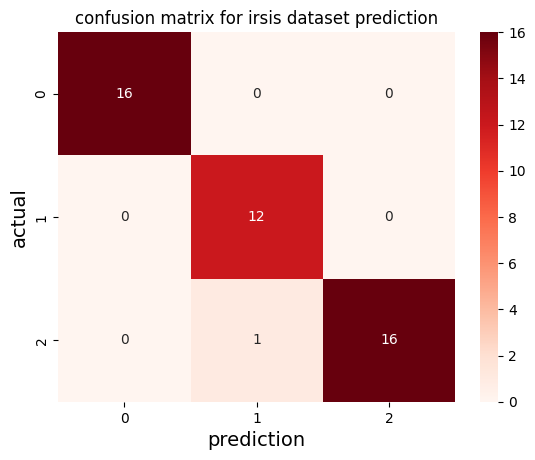

In [46]:
ax = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=species_name, yticklabels=species_name)
ax.set_title('confusion matrix for irsis dataset prediction')
ax.set_xlabel('prediction', fontsize=14)
ax.set_ylabel('actual', fontsize=14)